In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/airlines_flights.csv")

In [ ]:
print(df.describe())
print(df.info())

               index       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   de

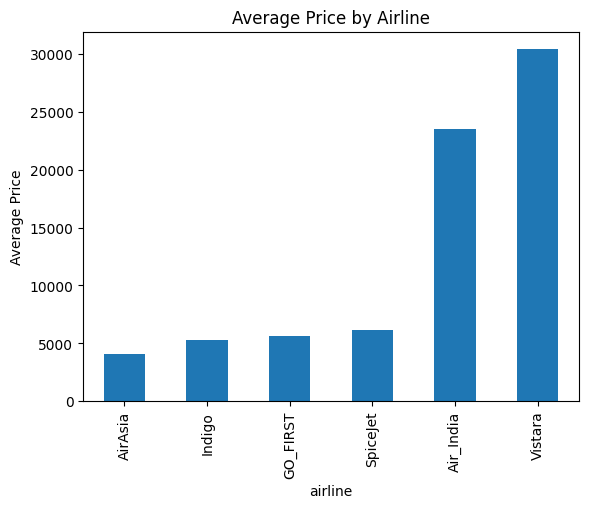

In [4]:
airline_price = df.groupby('airline')['price'].mean().sort_values()
airline_price.plot(kind='bar', title='Average Price by Airline')
plt.ylabel('Average Price')
plt.show()

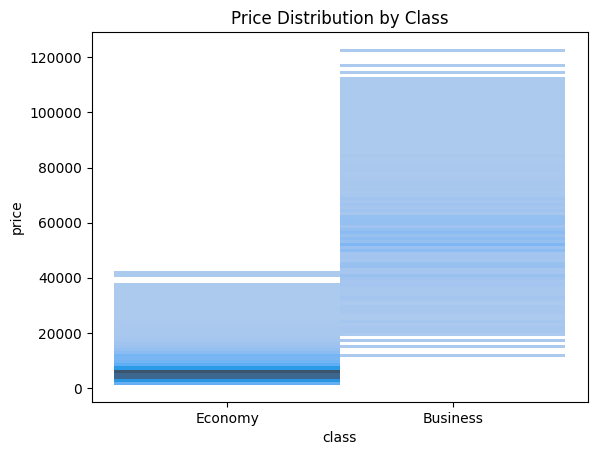

In [6]:
sns.histplot(x='class', y='price', data=df)
plt.title('Price Distribution by Class')
plt.show()

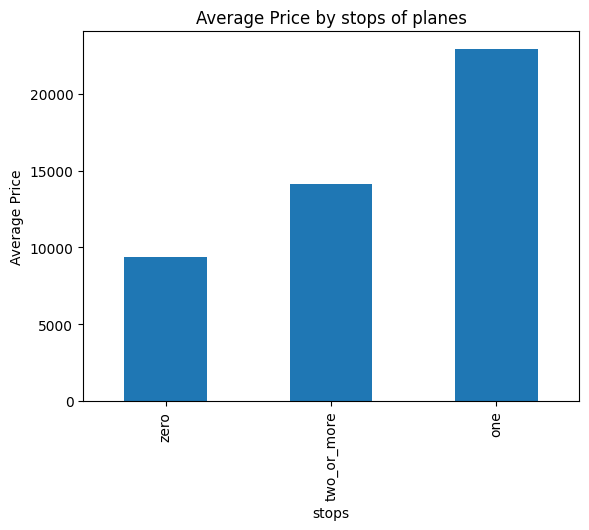

In [9]:
airline_price = df.groupby('stops')['price'].mean().sort_values()
airline_price.plot(kind='bar', title='Average Price by stops of planes')
plt.ylabel('Average Price')
plt.show()

In [24]:
# Create a mapping
stop_map = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

df['stops_num'] = df['stops'].map(stop_map)

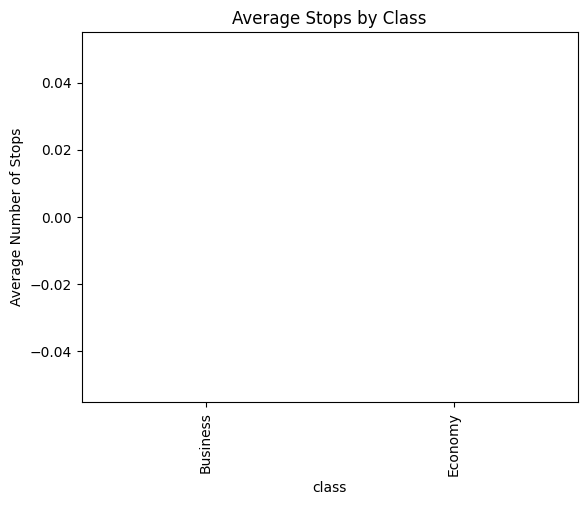

In [28]:
avg_stops_by_class = df.groupby('class')['stops_num'].mean()
avg_stops_by_class.plot(kind='bar', title='Average Stops by Class')
plt.ylabel('Average Number of Stops')
plt.show()

In [30]:
def convert_to_minutes(x):
    if pd.isnull(x):  # handle NaN values
        return None

    h, m = 0, 0
    x = str(x).strip().lower()

    if 'h' in x:
        h_part = x.split('h')[0].strip()
        h = int(h_part)
        x = x.split('h')[1].strip()
    if 'm' in x:
        m_part = x.replace('m', '').strip()
        if m_part:  # check if there's a number before 'm'
            m = int(m_part)

    return h * 60 + m

df['duration_mins'] = df['duration'].apply(convert_to_minutes)


In [32]:
df['duration_mins'].isnull().sum(), df['duration_mins'].shape[0]


(np.int64(0), 300153)

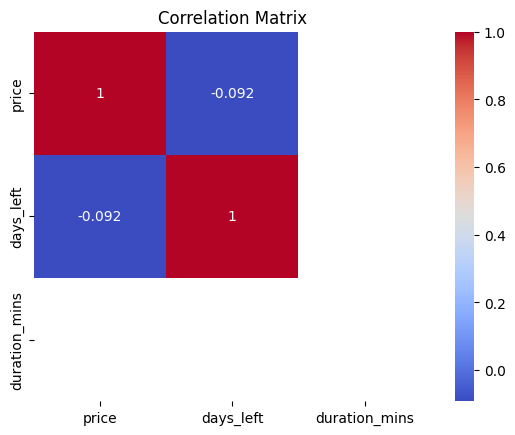

In [33]:
num_cols = ['price', 'days_left', 'duration_mins']
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
